# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Построить модель с максимально большим значением *accuracy* и исследовать базовые модели машинного обучения.

## Импорт:

### Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.dummy import DummyClassifier

### Импорт датасета

In [2]:
df = pd.read_csv('users_behavior.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


**Вывод:** Данные подготовлены, не содержат пропусков, типы данных соответствуют назначениям. Всего 3213 записей.


## Подготовка выборок

Выделяем признаки `features` и целевые значения `target` для обучения

In [5]:
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']

Делим исходные данные на обучающую и валидационную `...valid` выборки в соотношении 75% на 25%.

In [6]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=123, stratify=target)

In [7]:
#check
print('Размер тренировочной выборки признаков:', features_train.shape)
print('Размер проверочной выборки признаков:', features_valid.shape)

Размер тренировочной выборки признаков: (2410, 4)
Размер проверочной выборки признаков: (804, 4)


In [8]:
#check
print('Размер тренировочной выборки целевого значения:', target_train.shape)
print('Размер проверочной выборки целевого значения:', target_valid.shape)

Размер тренировочной выборки целевого значения: (2410,)
Размер проверочной выборки целевого значения: (804,)


## Модели машинного обучения

### Исследование модели "Дерево решений":

In [9]:
%%time
best_model_tree = None
best_aсcuracy_tree = 0
best_depth_tree = 0
samples_split_tree = None


for depth in range(1, 6):
    for min_samples_sp in range(2, 15):
        model = DecisionTreeClassifier(random_state=123, max_depth=depth)
        model.fit(features_train, target_train) 
        predictions_valid_tree = model.predict(features_valid)
        accuracy = accuracy_score(target_valid, predictions_valid_tree)
        if accuracy > best_aсcuracy_tree:
            best_model_tree = model
            best_aсcuracy_tree = accuracy
            best_depth_tree = depth
            samples_split_tree = min_samples_sp

CPU times: total: 391 ms
Wall time: 401 ms


In [10]:
print('Максимальная точность модели RandomForestClassifier:', best_aсcuracy_tree)
print(f'Максимальная точность достигнута при глубине {best_depth_tree}, \
    min_samples_split {samples_split_tree}')

Максимальная точность модели RandomForestClassifier: 0.7898009950248757
Максимальная точность достигнута при глубине 3,     min_samples_split 2


In [11]:
best_model_tree = tree.DecisionTreeClassifier(random_state=123, max_depth=3, min_samples_split=2)
best_model_tree.fit(features_train, target_train)

DecisionTreeClassifier(max_depth=3, random_state=123)

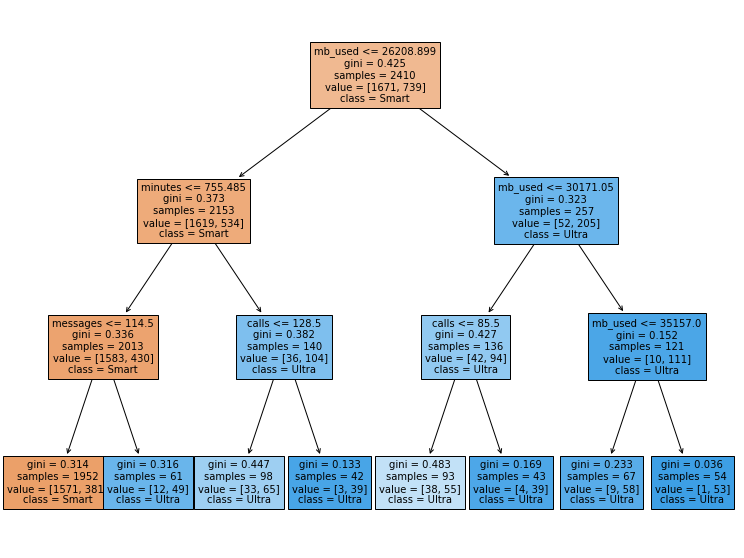

In [12]:
plt.figure(figsize=(13,10))
tree.plot_tree(
    best_model_tree, 
    fontsize=10, 
    class_names=['Smart','Ultra'], 
    feature_names=features.columns.values, filled=True)
plt.show()

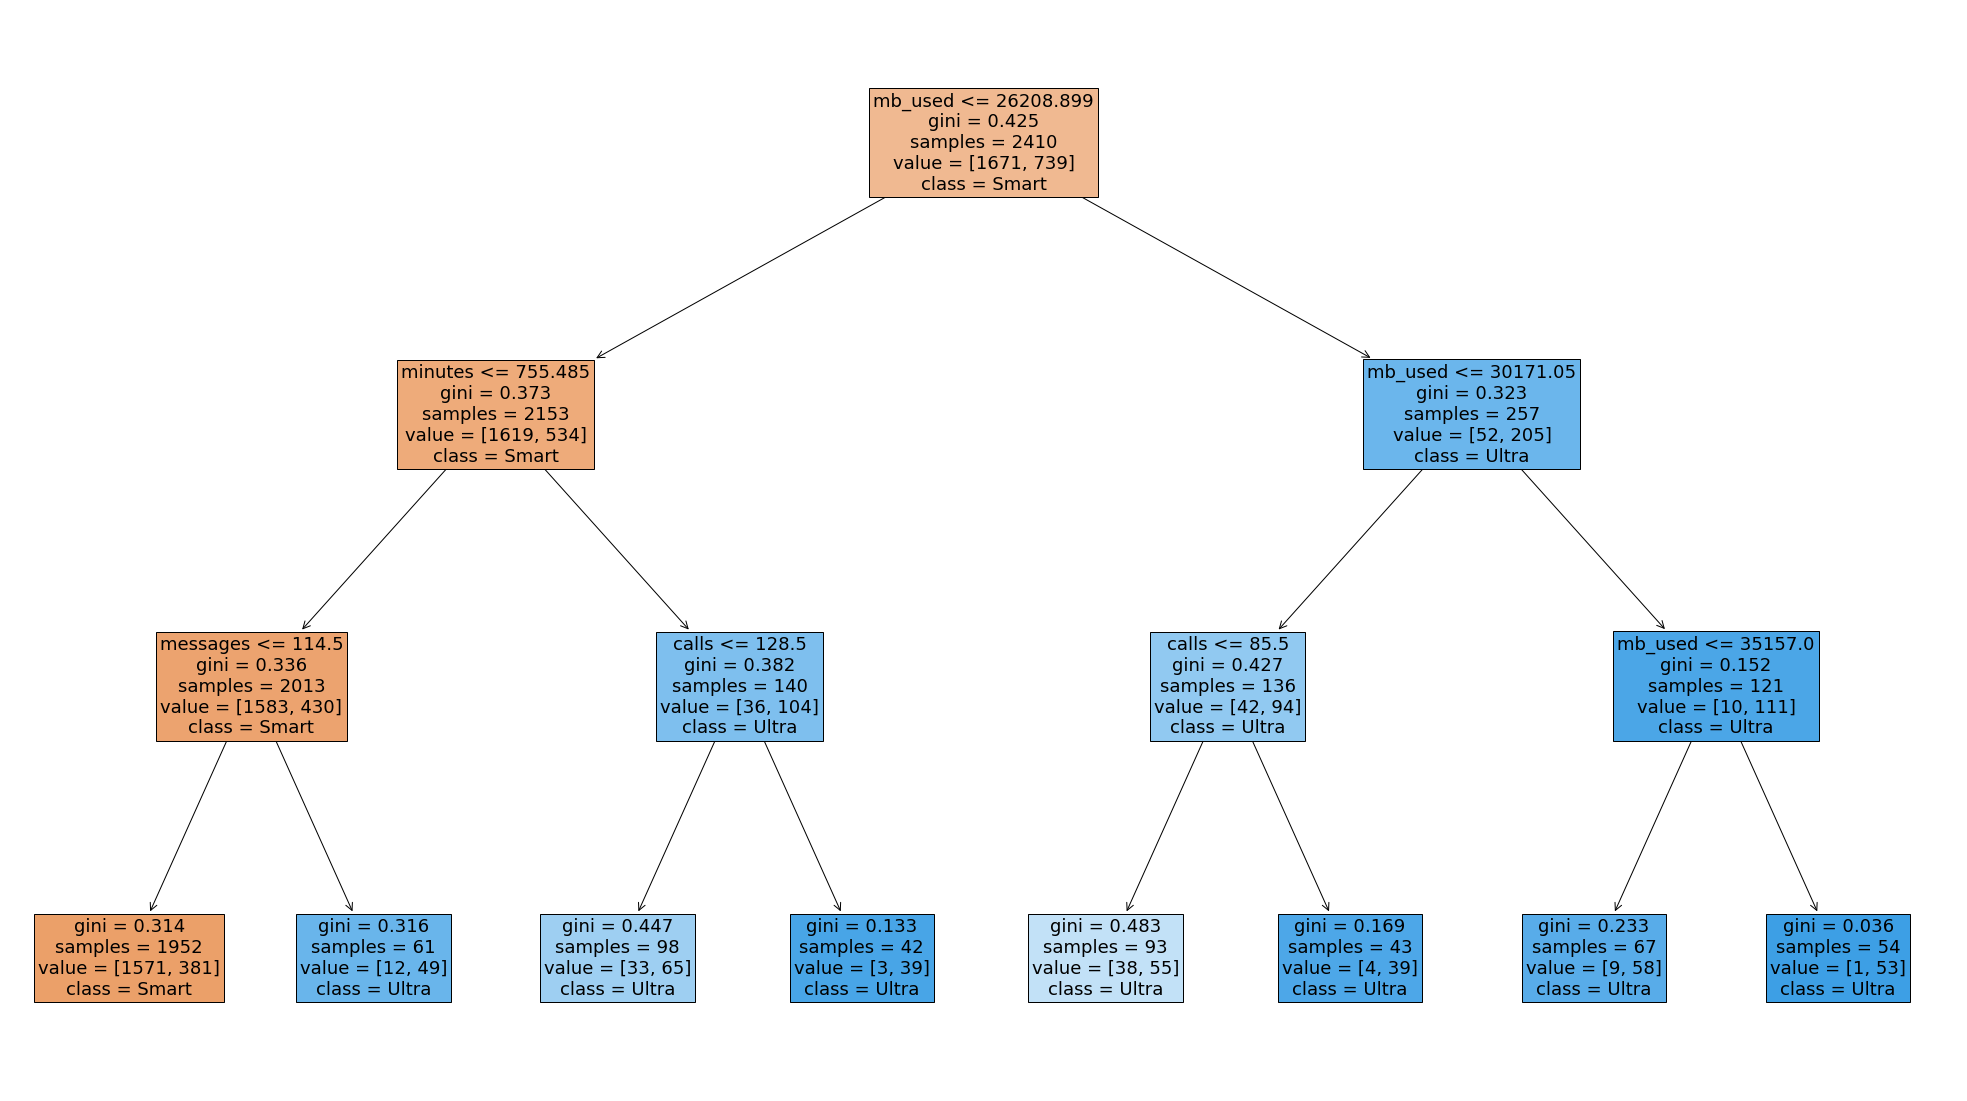

In [13]:
fig = plt.figure(figsize=(35,20))
_ = tree.plot_tree(best_model_tree, 
               feature_names=features.columns.values, 
               class_names=['Smart','Ultra'],
               filled=True,
               fontsize = 18)

**Вывод:** Максимальная точность модели "Решающий лес" не превышает 0.7947 при ограничении глубины рекомендуемыми значениями до 6. Однако при увеличении их числа точность повышается до 0.807 при увеличении временных затрат в 4 раза (с 0.305с до 1.23с). Остановимся на рекоммендуемых гиперпараметрах, т.к. разница в метрике незначительна

### Исследование модели "Случайный лес":

In [14]:
%%time
best_model_rf = None
best_accuracy_rf = 0
best_est_rf = None
samples_split_rf = None

for est in range(1, 20):
    for min_samples_sp in range(2, 30, 5):
        model = RandomForestClassifier(random_state=123, n_estimators=est, \
                                        min_samples_split=min_samples_sp) 
        model.fit(features_train, target_train)
        predictions_valid_rf = model.predict(features_valid)
        result_rf = accuracy_score(predictions_valid_rf, target_valid)
        if result_rf > best_accuracy_rf:
            best_model_rf = model
            best_accuracy_rf = result_rf
            best_est_rf = est
            samples_split_rf = min_samples_sp

CPU times: total: 7.77 s
Wall time: 7.79 s


In [15]:
print('Максимальная точность модели RandomForestClassifier:', best_accuracy_rf)
print(f'Максимальная точность достигнута при количеством деревьев {best_est_rf}, min_samples_split {samples_split_rf}')

Максимальная точность модели RandomForestClassifier: 0.8134328358208955
Максимальная точность достигнута при количеством деревьев 17, min_samples_split 27


### Исследование модели "Логистическая регрессия":

In [16]:
%%time
model_lr = LogisticRegression(random_state=123, solver='lbfgs', max_iter=200) 
model_lr.fit(features_train, target_train) # обучите модель на тренировочной выборке
predictions_valid_lr = model_lr.predict(features_valid) # получите предсказания модели на валидационной выборке
best_accuracy_lr = accuracy_score(target_valid, predictions_valid_lr)

CPU times: total: 46.9 ms
Wall time: 38 ms


In [17]:
print('Максимальная точность модели LogisticRegression:', best_accuracy_lr)

Максимальная точность модели LogisticRegression: 0.7624378109452736


**Вывод** Лучший результат показала модель "Случайный лес" с результатом точности 0.809 и параметрами:
- количество деревьев  = 10, 
- min_samples_split  = 22 . 

Худший - у модели "Логистическая прогрессия" со значением 0.697 и кротчайшим сроком выполнения 14 мс.

## Итоговое тестирование

In [18]:
model = RandomForestClassifier(random_state=123, n_estimators=10, \
                                           min_samples_split=22) 
model.fit(features_train, target_train)
predictions_test = model.predict(features_valid)
result_test = accuracy_score(predictions_test, target_valid)

print('Точность модели "Случайный лес" на тестовой выборке составила:', result_test)

Точность модели "Случайный лес" на тестовой выборке составила: 0.8022388059701493


## Проверка модели на адекватность

In [19]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(features_concat, target_concat)
DummyClassifier(strategy='most_frequent')
pr = dummy_clf.predict(features_valid)
dummy_clf.score(pr, target_valid)

NameError: name 'features_concat' is not defined

**Вывод:** Выбранная модель прошла тест на адекватность: точность модели превышает точность dummyclassifier на 15%.

## Выводы

- Произведен подбор гиперпараметров базовых моделей DT, RF, LR через цикл for
- Логистическая регрессия показала свою ограниченность при решении определенных задач и показала худшую метрику accuracy = 0.69. Значит, классы текущего датасета невозможно линейно разделить одной гиперплоскостью
- Модель RandomForestClassifier показала лучший результат за счет своей гибкости, возможности уловить нелинейные связи, усреднения результатов за счет ансамбля деревьев. Для нее построен график ветвления решений
- Проведена проверка модели на адекватность. Точность в сравнении с константной выше на 15%.